# Preparation of a FEMTIC inversion input files: data and mesh 

#### Synthetic data generated from the 3D forward modelling of a simple block model

#### Joint inversion of Z and VTF data

In [1]:
import sys
sys.path.append('/Users/sei029/Documents/projects/strategic_FEMTIC/repo_github/femticpy/src')
import femticPy

# FEMTIC

FEMTIC is a 3-D magnetotelluric inversion code. FEMTIC is made by object-oriented programming with C++. FEMTIC is applicable to land magnetotelluric survey data as well as ocean bottom magnetotelluric survey data.

#### References: 

1. Y. Usui, 3-D inversion of magnetotelluric data using unstructured tetrahedral elements: applicability to data affected by topography, Geophys. J. Int., 202 (2): 828-849,  https://doi.org/10.1093/gji/ggv186, 2015.

2. Y. Usui, Y. Ogawa, K. Aizawa, W. Kanda, T. Hashimoto, T. Koyama, Y. Yamaya and T. Kagiyama, Three-dimensional resistivity structure of Asama Volcano revealed by data-space magnetotelluric inversion using unstructured tetrahedral elements, Geophys. J. Int., 208 (3): 1359-1372,  https://doi.org/10.1093/gji/ggw459, 2017.

3. Y. Usui, T. Kasaya, Y. Ogawa and H. Iwamoto, Marine magnetotelluric inversion with an unstructured tetrahedral mesh, Geophys. J. Int., 214(2): 952-974,  https://doi.org/10.1093/gji/ggy171, 2018.

### GitHub repository: https://github.com/yoshiya-usui/femtic
### Code website: https://sites.google.com/view/yoshiyausui/femtic

### Resources / Manuals:

https://github.com/yoshiya-usui/femtic/tree/main/doc
Manual_Of_FEMTIC_v4.1.pdf

https://github.com/yoshiya-usui/makeTetraMesh/tree/master/doc
How_To_Make_Tetra_Mesh_For_FEMTIC.pdf


# `femticpy`

`femticpy` is a python module that allows to: 

- create the input observed data file from a list of .edi files
- prepare the files required to generate a mesh
- read, plot and QC the result of the inversion 

# 1. Prepare inversion data file

In [2]:
# the file will be written in the input_data directory
inversion = femticPy.DataGen(survey = 'synthetic', outdir = './inversion')

In [3]:
# Loading the data and the data coordinates
inversion.read_MTdata('./input_data/edi_files/')
inversion.read_MTdata_coordinates('./input_data', 'coords_MT.csv')

    reading 01.edi
    reading 02.edi
    reading 03.edi
    reading 04.edi
    reading 05.edi
    reading 06.edi
    reading 07.edi
    reading 08.edi
    reading 09.edi
    reading 10.edi
    reading 11.edi
    reading 12.edi
    reading 13.edi
    reading 14.edi
    reading 15.edi
    reading 16.edi
Read 16 .edi files


In [4]:
## Data to be inverted for
inversion.invert_Z   = True
inversion.invert_VTF = True
inversion.invert_PT  = False

In [5]:
# load the 3 files needed to create the mesh
inversion.topography = './input_data/topography.dat'
inversion.bathymetry = './input_data/bathymetry.dat'
inversion.coast_line = './input_data/coast_line.dat'

In [6]:
# we center the data to a anchor point (center of the data set) which will also be the center of the future mesh
inversion.center_data()
inversion.anchor

[0.0, 0.0]

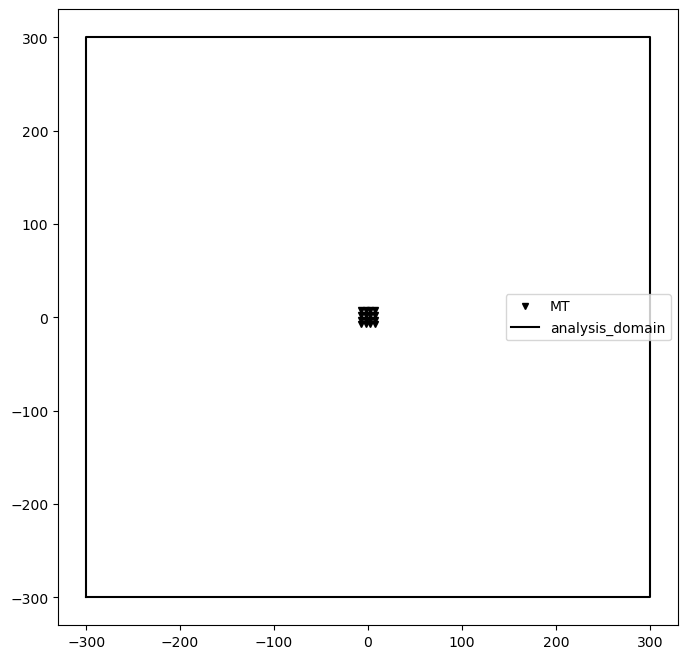

In [7]:
# we define the analysis domain, the extent of the total mesh including padding
inversion.analysis_domain = [[-300.0, 300.0],
                                [-300.0, 300.0],
                                [-300.0, 300.0]]
inversion.plot_data_loc(plot_ids = False, zoom_core=False)
#inversion.plot_coast_line()
inversion.plot_topo_bathy()

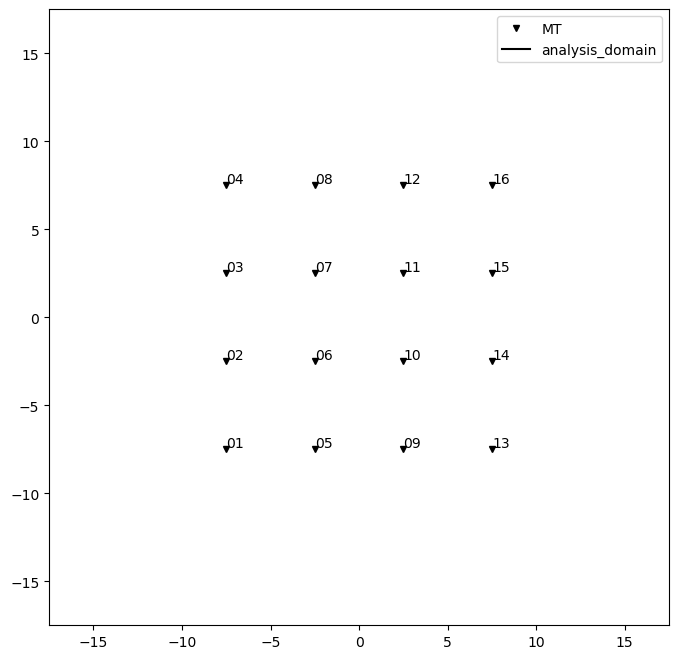

In [8]:
inversion.plot_data_loc(plot_ids = True, zoom_core=True)
#inversion01.plot_coast_line()
inversion.plot_topo_bathy()

In [9]:
# Set up error floors
# x% of (srqt(Zxy^2 + Zyx^2))
inversion.error_floor_Z = [0.03, 0.03, 0.03, 0.03] # [Zxx, Zxy, Zyx, Zyy]
inversion.error_floor_Tz = 0.03 # absolute error

Inversion data summary: 

  Inverting for 6 frequencies


  Impedance Z: 

  16 MT sites

  768 Impedance tensor data points (full Z tensor, Real and Imag data) 

  Data points per frequencies: 

    T = 1.000E+03s  nData =  16 

    T = 1.000E+02s  nData =  16 

    T = 1.000E+01s  nData =  16 

    T = 1.000E+00s  nData =  16 

    T = 1.000E-01s  nData =  16 

    T = 1.000E-02s  nData =  16 

  Tipper VTF: 

  16 MT sites

  384 VTF full tensor (Real and Imag data) 

  Data points per frequencies: 

    T = 1.000E+03s  nData =  16 

    T = 1.000E+02s  nData =  16 

    T = 1.000E+01s  nData =  16 

    T = 1.000E+00s  nData =  16 

    T = 1.000E-01s  nData =  16 

    T = 1.000E-02s  nData =  16 



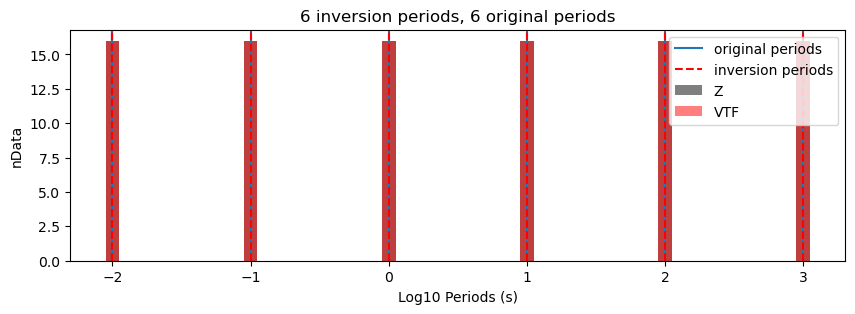

In [10]:
subsampling = 1
inversion.write_observe(write = True, freq_bandwidth = [0.00001,100], subsampling = subsampling)

# 2. Prepare inversion control file

In [11]:
# Define inversion parameters:

# DISTORTION
DISTORTION = 0 

#TRADE_OFF_PARAM
TRADE_OFF_PARAM = [3]

# Max number of iterations
ITERATION = 10

# NUM_THREADS
NUM_THREADS = 4

# CONVERGE
CONVERGE = 0.2


In [12]:
inversion.write_inversion_control(DISTORTION = DISTORTION,
                                    TRADE_OFF_PARAM = TRADE_OFF_PARAM,
                                    ITERATION = ITERATION,
                                    NUM_THREADS = NUM_THREADS,
                                    CONVERGE = CONVERGE)

# 3. Prepare mesh files

In [13]:
# output directory
outdir = 'meshGen/files'

In [14]:
# create meshGen object
mesh01 = femticPy.MeshGen(inversion.survey,
                         inversion.analysis_domain, 
                         inversion.center, 
                         inversion.mt_coords,
                         inversion.nRx_Z,
                         outdir)

In [15]:
# Step 1: 

# Define the mesh disretization, sphere centered on the mesh center 
    # core area: 650km sphere radius (isotropic) / max cell size : 50km (anisotropic in z)
    # padding: 2000km sphere radius (isotropic), max cell size: 500km (isotropic)

mesh01.center = [0.0, 0.0, 0.0]
mesh01.rotation = 0
mesh01.ellipsoids_control = [3,
                     [15, 2, 0.0, 0.0, 0.0],  
                     [30, 5, 0.0, 0.0, 0.0],        
                     [200.0, 100.0, 0.0, 0.0, 0.0]]

mesh01.coast_line = r'.\input_data\coast_line.dat'

mesh01.ellipsoids_observing_sites =  [1, 
                                      1., 1.]

In [16]:
# Step 6: Refine
# this step refines the tetras around the MT sites

mesh01.ellipsoids_obs_sites = [1,                     
                    [1., 0.5, 0.3]]


mesh01.ellipsoids_mtr = [4,
                    [10, 2, 0.0, 0.0, 0.0],
                    [30, 5, 0.0, 0.0, 0.0],      
                    [100.0, 100.0, 0.0, 0.0, 0.0],
                    [300, 100.0, 0.0, 0.0, 0.0]]

In [17]:
# Step 7: Write mesh to FEMTIC format
# the attr file will determine how tetras will be combined to do elememnts (model parameters)

mesh01.ellipsoids_resistivity_attr = [3,
                    [15.0,  2.0,  0.0,  0.0],  
                    [30, 5.0, 0.0, 0.0], 
                    [300.0,  300.0,  0.0,  0.0]] 


mesh01.ellipsoids_resistivity_attr_sites = [1, 
                    [1.0, 1.0]]

In [18]:
# Define the starting model resistivities (in ohm.m)
mesh01.resistivity_starting_model = 100

In [19]:
mesh01.write_inputs()

In [20]:
# number of regions (air, land, sea) 
mesh01.region_attributes

2

# 4. Run `create_mesh.sh`

the `create_mesh.sh` script call the `meshGen.sh` pipeline, that sequentially runs all the steps required to create the mesh. Depending on the size of the mesh this can take long (~ 10 min). 

"Step 4" in `meshGen.sh` needs to be modified to your problem:

```
#-----------------------"
#-----   STEP 4    -----"
#-----------------------"

echo "STEP 4... "
/scratch3/sei029/femtic/makeTetraMesh -stp 4
sed -i "$(( $(wc -l < output.poly) ))s/.*/2/" output.poly
echo "1   0.0 0.0 -40.0  10 1e9" >> output.poly
echo "2  0.0 0.0  10.0  20 1e9" >> output.poly
#echo "3   0.0 0.0  40.0  30 1e9" >> output.poly
echo "   done!"
sleep 1
```

In this step, 2 lines are added to the `output.poly` file. They correspond to:

`"region_attribute   x   y   z   region_number   1e9"`

x, y, z (in km) should indicate at which location a sample of each region can be found. z is positive downwards.

The region numbers have to match with the ones in `resistivity_attr.dat`

```
2
10 1.0e+9 -1 1
20 100.0   9 0
```

10 is for air, 20 for earth (with associated resistivities)

"Step 5" in `meshGen.sh` calls a python script that fixes a bug that has been appearing sometimes. This is a temporary fix while understanding why a new region number (31 or 32) sometimes appears during step 5. 

```
echo "fix output.1.ele if necessary... "
module load python
python fix_output1.py
sleep 1
echo "   done!"
```

To check the size of the mesh, check the `resistivity_block_iter0.dat` file. The first number is the number of elements, the second is te number of cells.

```
>head resistivity_block_iter0.dat 
   1453333    206736
         0         0
....
```

# 5. Visualise the mesh using paraview (before running the inversion)

Setting up the ellipsoids is cumbersome and takes some trials to obtain a mesh that looks ok, in terms of cells discretization and mesh size. 

If the shell script has run properly, the final files to be used for the inversion should be:
- resistivity_block_iter0.dat
- mesh.dat



The output files that can be copied over and are useful for visualization are:

- output.6.femtic.vtk
   - to check the model parameter discretization (the cells), use the blockSerial attribute of the .vtk file
- triangles_with_height.vtk
- coastLine_fine.vtk
- coastLine_rough.vtk

The last 3 files are in km, and a transform filter has to be applied in paraview to be visualized with `output.6.femtic.vtk` (which is m)

# 6. Running the inversion using `run_inversion.sh`